In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels  as sm

In [4]:
df = pd.read_csv(r'C:\Users\ebaraka\Downloads\bank-marketing-dataset-cleaned.csv')
df.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,n_contacts_prev_campaign,prev_campaign_outcome,registered,location
0,38.0,student,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,0,nonexistent,no,Albufeira
1,34.0,services,married,professional.course,no,no,no,cellular,may,mon,190.0,3,0,nonexistent,no,Mealhada
2,43.0,housemaid,unknown,unknown,unknown,yes,yes,cellular,jul,thu,97.0,2,0,nonexistent,no,Vila Franca de Xira
3,75.0,retired,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,0,nonexistent,no,Mirandela
4,58.0,retired,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,0,nonexistent,no,Funchal


In [5]:
df.shape

(11669, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11669 non-null  object 
 6   personal_loan             11669 non-null  object 
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

In [7]:
df.isna().any()

age                         False
job                         False
marital                     False
education                   False
credit_in_default           False
housing_loan                False
personal_loan               False
last_contact_type           False
last_contact_month          False
last_contact_day            False
last_contact_duration       False
n_contacts_this_campaign    False
n_contacts_prev_campaign    False
prev_campaign_outcome       False
registered                  False
location                    False
dtype: bool

In [11]:
df.T.duplicated()

age                         False
job                         False
marital                     False
education                   False
credit_in_default           False
housing_loan                False
personal_loan               False
last_contact_type           False
last_contact_month          False
last_contact_day            False
last_contact_duration       False
n_contacts_this_campaign    False
n_contacts_prev_campaign    False
prev_campaign_outcome       False
registered                  False
location                    False
dtype: bool

In [12]:
df.duplicated().any()

False

# Modelling

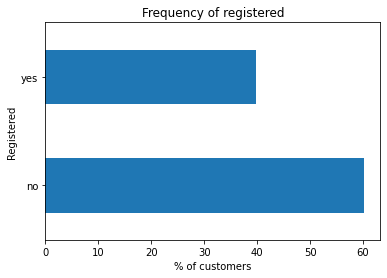

In [16]:
(df.registered.value_counts(normalize=True)*100).plot(kind='barh')
plt.title('Frequency of registered')
plt.xlabel('% of customers')
plt.ylabel('Registered')
plt.show()

for classification problem, performance is a bad metric...

We have class imbalance problem

ModuleNotFoundError: No module named 'Ipython'

In [21]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [23]:
%pip install Ipython

Note: you may need to restart the kernel to use updated packages.


In [24]:
from Ipython.display import display_markdown

ModuleNotFoundError: No module named 'Ipython'

In [25]:
display(Markdown(df.to_markdown(index = False)))

NameError: name 'Markdown' is not defined

We need to convert registered column to boolean/ or 1 or 0s. the logistic regression equation requires numbers...

In [ ]:
# we can use the following command to change 1 and 0s
np.where
map()
replace()

In [26]:
df['registered'] = df['registered'].replace(['no', 'yes'], [0, 1])
#df['registered'] = df['registered'].map({0: 'no', 1: 'yes'})

In [27]:
df['registered'].unique()

array([0, 1], dtype=int64)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11669 non-null  object 
 6   personal_loan             11669 non-null  object 
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

In [29]:
df.job.value_counts(normalize=True)*100

admin.           24.757906
blue-collar      18.681978
technician       15.151255
services          8.655412
management        6.675808
unknown           6.658668
retired           5.518896
student           3.162225
self-employed     3.050818
entrepreneur      2.802297
unemployed        2.468078
housemaid         2.416660
Name: job, dtype: float64

In [30]:
df.job.nunique()

12

In [41]:
# one hot encoding
# ml categorical encoding

# GUIDE TO ENCODING CATEGORICAL VARIABLES

# Let's encode each categorical variable using one hot encoding (no ordinal relationship present)


# starting with credit_default

df['credit_default'] = df['credit_in_default'].replace(['no', 'yes', 'unknown'], [0, 1, 1])
df['credit_default'] = df['credit_in_default'].map({'no': 0, 'yes': 1, 'unknown': 1})

In [42]:
df.credit_in_default.value_counts(normalize = True)*100

no         82.680607
unknown    17.310824
yes         0.008570
Name: credit_in_default, dtype: float64

differences between map (only on series/column) and replace (can be done on series and df)

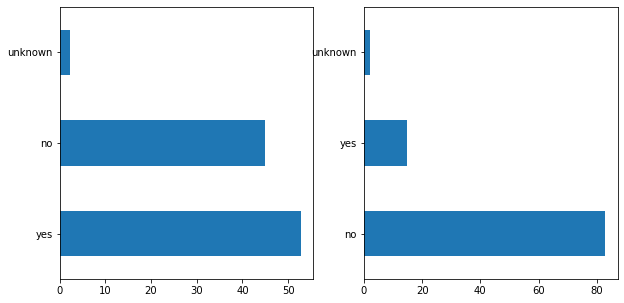

In [47]:
plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
(df['housing_loan'].value_counts(normalize=True)*100).plot(kind='barh')

plt.subplot(1, 2, 2)
(df['personal_loan'].value_counts(normalize=True)*100).plot(kind='barh')
plt.show()

In [50]:
df['personal_loan'] = df['personal_loan'].map({'no': 0, 'yes': 1, 'uknown': 1})
df['personal_loan'].value_counts()

0.0    9680
1.0    1729
Name: personal_loan, dtype: int64

In [51]:
# instead of doing all this, we can write a for loop

loan_cols = [col for col in df.columns if 'loan' in col]
for col in loan_cols:
    df[col] = df[col].map({'no': 0, 'yes': 1, 'uknown': 0})
    df[col].value_counts()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11409 non-null  float64
 6   personal_loan             0 non-null      float64
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

In [53]:
df.drop('persional_loan', axis=1, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11409 non-null  float64
 6   personal_loan             0 non-null      float64
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

In [55]:
df.last_contact_type.value_counts()

cellular     8111
telephone    3558
Name: last_contact_type, dtype: int64

In [56]:
df['last_contact_type'] = np.where(df['last_contact_type'] == 'cellular', 1, 0)
df.last_contact_type.value_counts()

1    8111
0    3558
Name: last_contact_type, dtype: int64

In [57]:
df['prev_campaign_outcome'].value_counts()

nonexistent    9388
failure        1302
success         979
Name: prev_campaign_outcome, dtype: int64

In [58]:
# one hot encoding
df['education'].value_counts()

university.degree      3412
high.school            2556
basic.9y               1471
professional.course    1358
unknown                1215
basic.4y               1067
basic.6y                583
illiterate                7
Name: education, dtype: int64

In [61]:
#feature engineering - creating new features from existing ones

df['education'] = df['education'].map({'basic.4y': 'basic', 
                                       'basic.6y': 'basic', 
                                       'basic.9y': 'basic',
                                       'high.school': 'high.school',
                                        'illiterate': 'illiterate',
                                        'professional.course': 'professional.course',
                                        'university.degree': 'university.degree',
                                        'unknown': 'unknown'})

In [62]:
df.education.value_counts()

university.degree      3412
professional.course    1358
unknown                1215
illiterate                7
Name: education, dtype: int64

In [63]:
df['last_contact_day'] = df['last_contact_day'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7})

# since day is ordinal, we can use label encoding...

In [ ]:
## FEATURE ENGINEERING 
### LABEL ENCODING, ONE HOT ENCODING, BINARY ENCODING

In [64]:
df.last_contact_day.value_counts()

4    2544
3    2354
1    2322
2    2260
5    2189
Name: last_contact_day, dtype: int64

In [66]:
df.last_contact_month.value_counts()

may    3361
jul    1909
aug    1722
jun    1488
nov    1090
apr     943
oct     398
mar     333
sep     319
dec     106
Name: last_contact_month, dtype: int64

In [69]:
df['last_contact_quarter'] = pd.to_datetime(df['last_contact_month'], format = '%b').dt.quarter
df.last_contact_quarter.value_counts()

2    5792
3    3950
4    1594
1     333
Name: last_contact_quarter, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 5992 non-null   object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11409 non-null  float64
 6   personal_loan             0 non-null      float64
 7   last_contact_type         11669 non-null  int32  
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  int64  
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

In [72]:
 # be strategic about how you use encoding. we always do not wanna one hot encode everything because it'll create many variables
    # we want to avoid one hot encoding everything because it'll create many variables

,divorced,married,single,unknown
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
11664,0,1,0,0
11665,0,1,0,0
11666,0,1,0,0
11667,0,1,0,0


In [73]:
df.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'credit_in_default',
       'last_contact_month', 'prev_campaign_outcome', 'location'],
      dtype='object')

In [77]:
df.location.value_counts()

unknown              689
Agualva-Cacém        517
Águeda               269
Covilhã              266
Funchal              266
                    ... 
Cantanhede             1
Rio Maior              1
Felgueiras             1
Paços de Ferreira      1
Vizela                 1
Name: location, Length: 148, dtype: int64

In [78]:
df.drop(columns = ['location'], inplace = True)

In [79]:
pd.get_dummies(df)

,age,housing_loan,personal_loan,last_contact_type,last_contact_day,last_contact_duration,n_contacts_this_campaign,n_contacts_prev_campaign,registered,credit_default,...,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_nonexistent,prev_campaign_outcome_success
0,38.0,0.0,NaN,1,2,244.0,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,34.0,0.0,NaN,1,1,190.0,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,43.0,1.0,NaN,1,4,97.0,2,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,75.0,0.0,NaN,1,3,113.0,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,58.0,NaN,NaN,0,2,174.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11664,62.0,1.0,NaN,1,4,208.0,1,6,1,0,...,0,0,0,0,1,0,0,0,0,1
11665,62.0,0.0,NaN,1,4,483.0,2,3,1,0,...,0,0,0,0,1,0,0,0,0,1
11666,37.0,1.0,NaN,1,5,281.0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
11667,73.0,1.0,NaN,1,5,334.0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 5992 non-null   object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11409 non-null  float64
 6   personal_loan             0 non-null      float64
 7   last_contact_type         11669 non-null  int32  
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  int64  
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

without removing the reference category, fit a linear regression
remove it, and see what ouput you get. 

## whenever you are dealing with one hot encoding, remove the reference category to prevent a multicollinearity problem...Statsmodel drops the reference category automatically. 

## HOW DOES ONE HOT ENCODING INTRODUCE MULTICOLLINEARITY THOUGH???

In [81]:
pd.get_dummies(df['marital'], drop_first=True)

,married,single,unknown
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
11664,1,0,0
11665,1,0,0
11666,1,0,0
11667,1,0,0


In [91]:
#reference_categories = ['job_unknown', 'marital_unknown', 'education_unknown', 'housing_loan_unknown', 'personal_loan_unknown', 'contact_unknown', 'last_contact_month_unknown', 'last_contact_day_unknown' 'prev_campaign_outcome_nonextistent']
dummy_df = pd.get_dummies(df)
#dummy_df.drop(columns = reference_categories, inplace = True)
# remember to drop these columns

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 5992 non-null   object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11409 non-null  float64
 6   personal_loan             0 non-null      float64
 7   last_contact_type         11669 non-null  int32  
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  int64  
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

# MODELING

- define input matrix X and output vector y
- initialize the model
- model.fit(), train
- model.predict(), to make predictions

In [103]:
X = dummy_df.drop(columns = 'registered')
print(X.shape)
y = dummy_df['registered'].copy()
print(y.shape)

# the dimensions match so we can do dop product

(11669, 44)
(11669,)


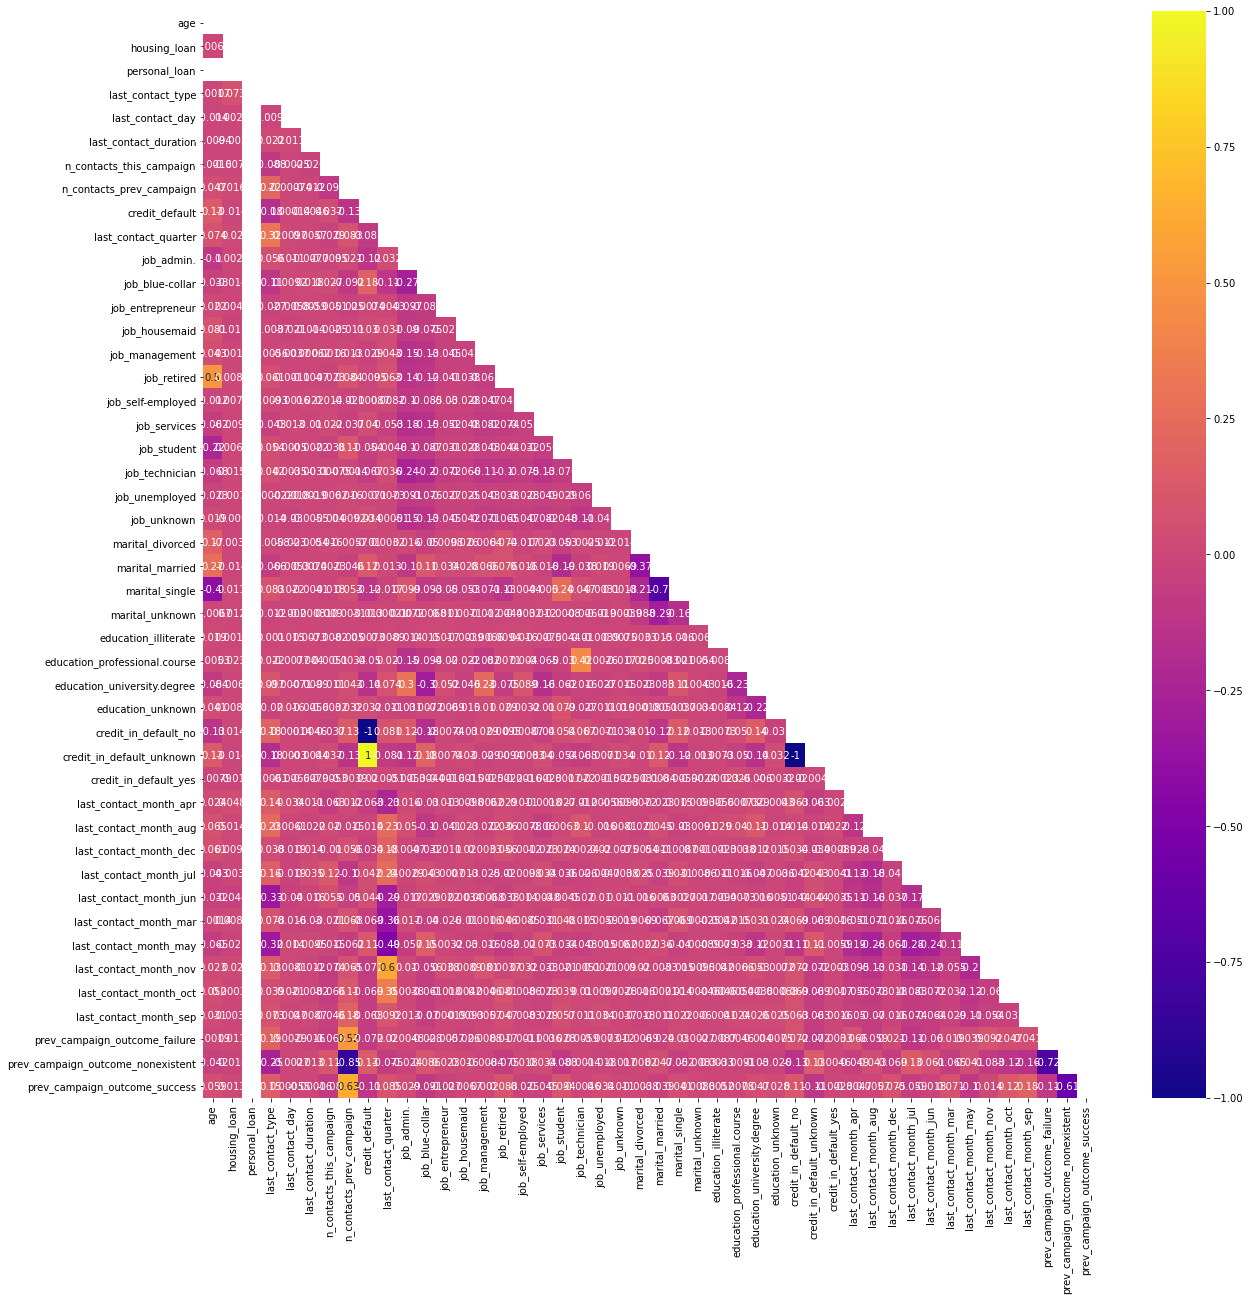

In [96]:
## check for multicolinerity

# get rid of of the upper triangle of the matrix
corr = X.corr()
mask = np.triu(corr)
plt.figure(figsize = (20, 20))
sns.heatmap(corr, annot=True, mask=mask, vmin = -1, vmax = 1, cmap = 'plasma')
plt.show()

In [97]:
import statsmodels.api as sm


In [98]:
X_constant = sm.add_constant(X)
df_logit = sm.Logit(y, X_constant)
result = df_logit.fit()
print(result.summary())

MissingDataError: exog contains inf or nans

In [100]:
dummy_df.drop(columns = ['housing_loan', 'personal_loan'], inplace = True)

In [104]:
X_constant = sm.add_constant(X)
df_logit = sm.Logit(y, X_constant)
result = df_logit.fit()
print(result.summary())

         Current function value: 0.433633
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             registered   No. Observations:                11669
Model:                          Logit   Df Residuals:                    11631
Method:                           MLE   Df Model:                           37
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.3547
Time:                        17:24:35   Log-Likelihood:                -5060.1
converged:                      False   LL-Null:                       -7841.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.7444        nan        nan        nan         nan         

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


rather than dropping highly correlated columns, you can go ahead and fit the model, and compare befdore you drop them. you may or may not see a good improvements


### feature selection: improve the performance of the model. look at the coeffiencts and p values and remove some of them and see if they improve the model. 

In [ ]:
## not recommended to use accuracy as a metric for model selection instead use the scikit learn's accuracy_score